In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import preprocessing
%matplotlib inline

In [81]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [83]:
# check null values
df.isnull().sum().max()

0

In [84]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [85]:
print("No fraud ", round(df['Class'].value_counts()[0]/len(df) * 100,2))
print("Fraud ", round(df['Class'].value_counts()[1]/len(df) * 100,2))

No fraud  99.83
Fraud  0.17


Text(0.5,1,'count distributions of fraud and non fraud')

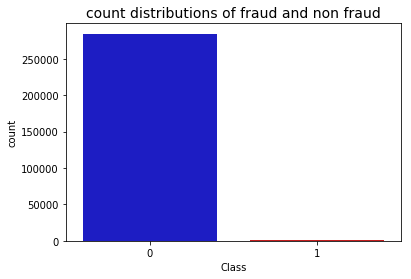

In [86]:
colors = ['#0101DF','#DF0101']
sns.countplot('Class', data= df,palette=colors)
plt.title("count distributions of fraud and non fraud",fontsize=14)

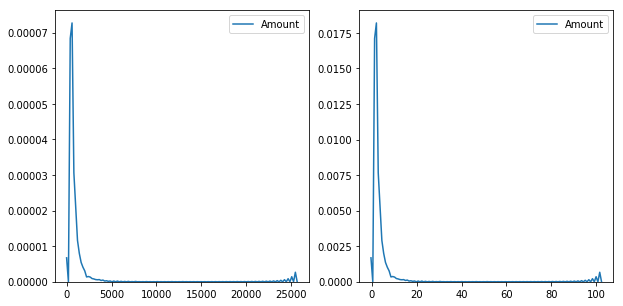

In [87]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize = (10,5))
scaler = preprocessing.StandardScaler()
scaled_amount = scaler.fit_transform(pd.DataFrame(df['Amount'],columns=['Amount']))
scaled_df = pd.DataFrame(scaled_amount,columns=['Amount'])
sns.kdeplot(df['Amount'],ax= ax1)
sns.kdeplot(scaled_df['Amount'],ax=ax2)

In [88]:
rob_scaler = preprocessing.RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount','Time'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]


Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]


Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]


Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]


Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]


In [108]:
# random under-sampling
df.sample(frac=1)
fraud_df = df.loc[df['Class']==1]
nonfraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df,nonfraud_df])
new_df = normal_distributed_df.sample(frac =1,random_state=40)
new_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,3.226717,0.006967
111690,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,-4.684233,...,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,1,3.030811,-0.145267
160,-0.378602,0.274579,-0.129488,-2.682799,-0.731375,-0.226354,-0.006949,-2.778983,-0.233232,-0.588714,...,-2.776923,-0.466756,-0.714697,1.136720,-0.981993,0.356781,0.148444,0,2.249004,-0.993809
15781,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,...,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1,1.089779,-0.675208
10568,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,...,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1,-0.293440,-0.789154


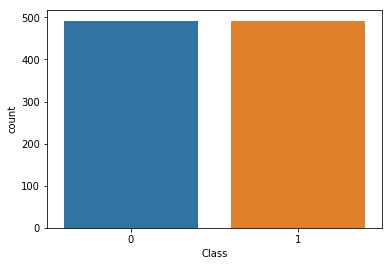

In [91]:
new_df['Class'].value_counts()
sns.countplot('Class',data=new_df)

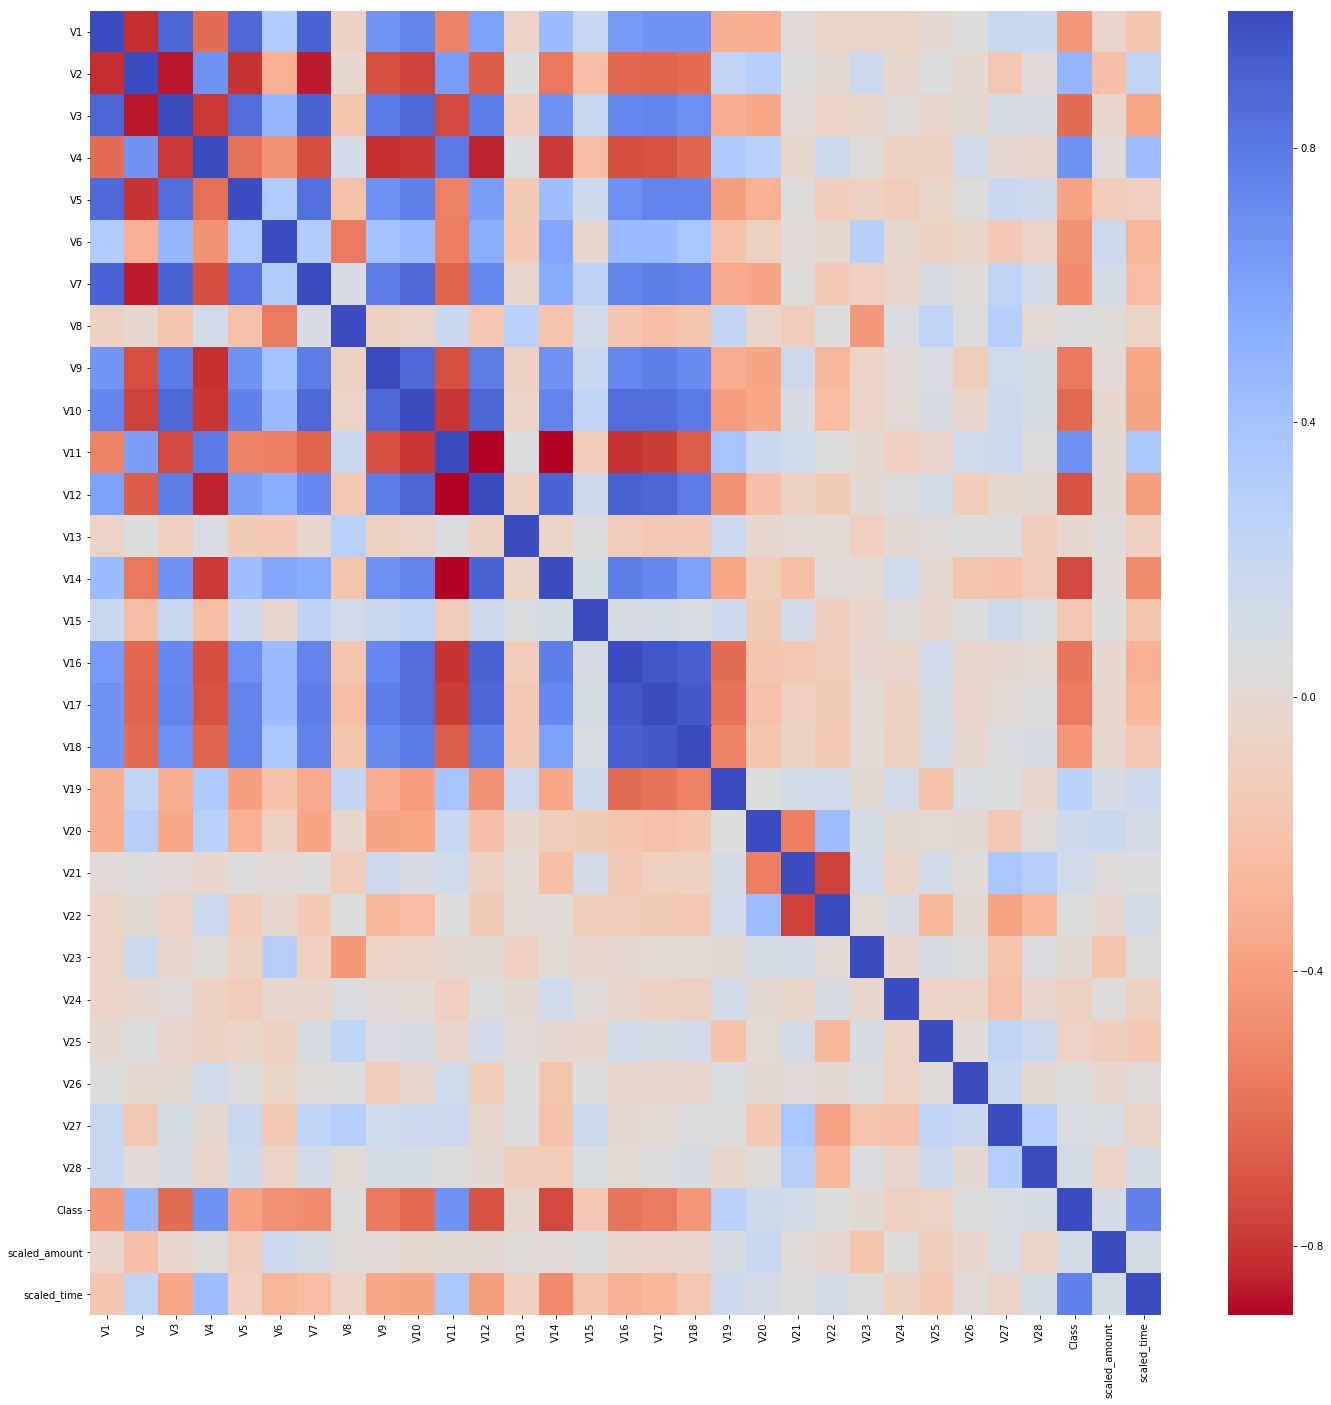

In [92]:
#correlation matrix
new_df_corr = new_df.corr()
fig,ax = plt.subplots(figsize=(24,24))
sns.heatmap(new_df_corr,cmap='coolwarm_r', annot_kws={'size':20},ax=ax)

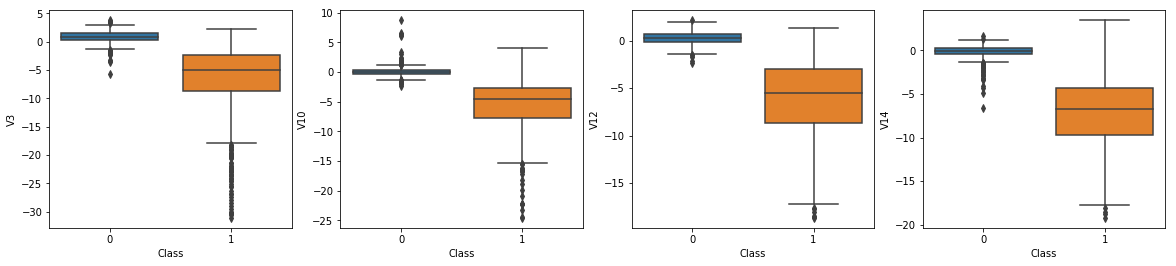

In [93]:
# positive = v2,v11, v19, scaled_time
# negative = v3, v10, v12, v14
fig, axes = plt.subplots(1,4,figsize = (20,4))
sns.boxplot(x='Class',y='V3',data=new_df,ax = axes[0])
sns.boxplot(x='Class',y='V10',data=new_df,ax=axes[1])
sns.boxplot(x='Class', y='V12',data=new_df,ax = axes[2])
sns.boxplot(x='Class', y='V14',data=new_df,ax=axes[3])


In [109]:
# removing v14 outliers
fraud_v14 = new_df['V14'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(fraud_v14,25), np.percentile(fraud_v14,75)
iqr_v14 = q75-q25
cut_off_v14 = iqr_v14 *1.5
lower_v14,upper_v14 = q25-cut_off_v14,q75+cut_off_v14
outliers = [x for x in fraud_v14 if x < lower_v14 or x > upper_v14]
print(outliers)
new_df = new_df.drop(new_df[(new_df['V14'] > upper_v14) | (new_df['V14']< lower_v14)].index)

[-18.8220867423816, -18.4937733551053, -18.049997689859396, -19.2143254902614]


In [110]:
# removing v12 outliers
fraud_v12 = new_df['V12'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(fraud_v12,25),np.percentile(fraud_v12,75)
iqr_v12 = q75-q25
cut_off_v12 = iqr_v12*1.5
lower_v12 , upper_v12 = q25-cut_off_v12 , q75+cut_off_v12
outliers = [x for x in fraud_v12 if x < lower_v12 or x > upper_v12]
print(outliers)
new_df = new_df.drop(new_df[(new_df['V12'] > upper_v12) | (new_df['V12'] < lower_v12)].index)

[-18.047596570821604, -18.553697009645802, -18.4311310279993, -18.683714633344298]


In [111]:
# removing v10 outliers
fraud_v10 = new_df['V10'].loc[new_df['Class']==1].values
q25,q75 = np.percentile(fraud_v10,25), np.percentile(fraud_v10,75)
iqr_v10 = q75-q25
cut_off_v10 = iqr_v10 * 1.5
lower_v10, upper_v10 = q25-cut_off_v10, q75+ cut_off_v10
outliers = [x for x in fraud_v10 if x < lower_v10 or x > upper_v10]
print(outliers)
new_df = new_df.drop(new_df[(new_df['V10'] > upper_v10) | (new_df['V10'] < lower_v10)].index)

[-15.2399619587112, -23.2282548357516, -24.5882624372475, -18.2711681738888, -20.949191554361104, -24.403184969972802, -22.1870885620007, -15.124162814494698, -22.1870885620007, -14.9246547735487, -22.1870885620007, -16.6011969664137, -15.563791338730098, -15.346098846877501, -19.836148851696, -16.7460441053944, -16.3035376590131, -18.9132433348732, -16.2556117491401, -17.141513641289198, -15.1237521803455, -14.9246547735487, -15.2399619587112, -15.563791338730098, -16.6496281595399, -22.1870885620007, -15.2318333653018]


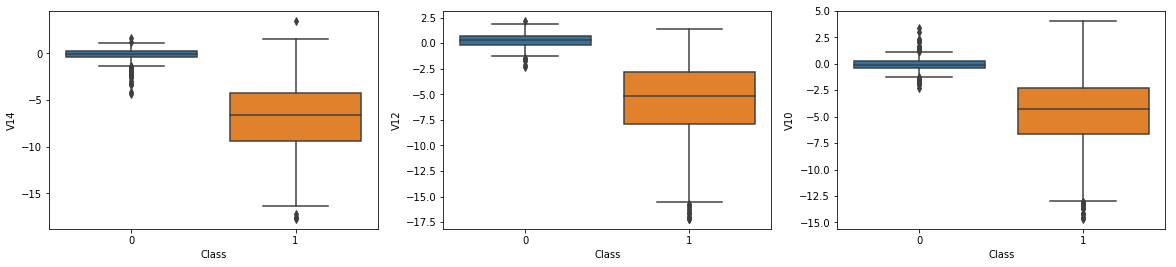

In [112]:
fig, axes = plt.subplots(1,3,figsize = (20,4))
sns.boxplot(x = 'Class', y= 'V14',data= new_df,ax= axes[0])
sns.boxplot(x= 'Class',y='V12', data= new_df, ax = axes[1])
sns.boxplot(x = 'Class', y= 'V10',data=new_df,ax = axes[2])